<a href="https://colab.research.google.com/github/diegofdogonzalez/repositorio1-/blob/master/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# importar librerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/Procesamiento digital de imagenes/colab/images/'
os.chdir(path)
!pwd
# graficar imagenes estaticas en el notebook
%matplotlib inline

/content/drive/My Drive/Procesamiento digital de imagenes/colab/images


In [0]:
def displayGray3(a,b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(3,3))
    plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.ticks([]), plt.yticks([])
    plt.show
    
def displayGray2(a,b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show
    
def displayColor3(a,b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.ticks([]), plt.yticks([])
    plt.show
    
def displayColor2(a,b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

# **Interpolacion vecino más cercano**

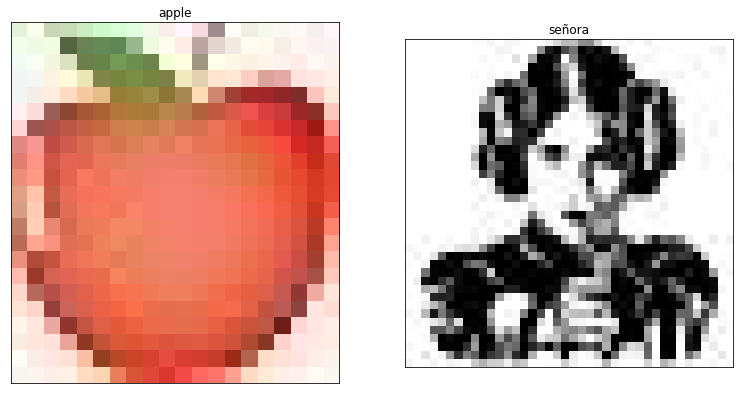

In [5]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx = 5, fy = 5, interpolation = cv2.INTER_NEAREST)
near_imgM = cv2.resize(imgM, None, fx = 5, fy = 5, interpolation = cv2.INTER_NEAREST)
displayColor2(near_imgA,near_imgM,'apple','señora')

# **Interpolacion lineal**

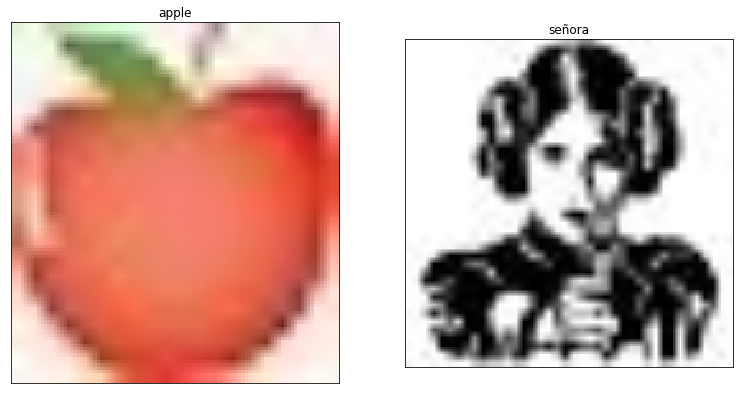

In [6]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx = 5, fy = 5, interpolation = cv2.INTER_LINEAR)
near_imgM = cv2.resize(imgM, None, fx = 5, fy = 5, interpolation = cv2.INTER_LINEAR)
displayColor2(near_imgA,near_imgM,'apple','señora')

# **Interpolación bicubica**

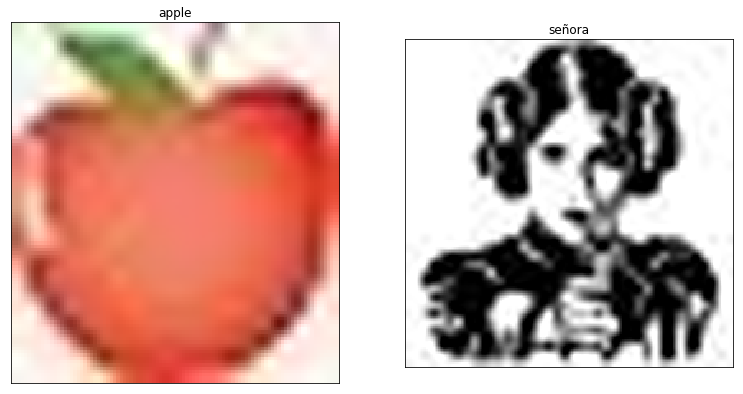

In [0]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA, None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
near_imgM = cv2.resize(imgM, None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
displayColor2(near_imgA,near_imgM,'apple','señora')

# **Otros metodos**

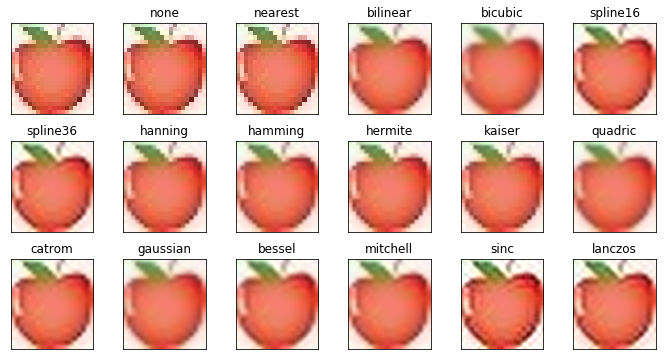

In [0]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']



fig, axes = plt.subplots(3, 6, figsize=(12,6),subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(imgA, interpolation=interp_method)
    ax.set_title(interp_method)
    
plt.show()

# **Negativo de una imagen a color**

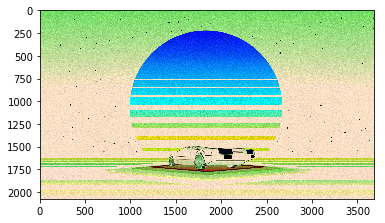

In [7]:

from PIL import Image

foto = Image.open('1980.jpg')

datos = list(foto.getdata())

datos_invertidos = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]

imagen_invertida = Image.new('RGB', foto.size)

imagen_invertida.putdata(datos_invertidos)

#imagen_invertida.save('1980_2.jpg')

plt.imshow(np.asarray(imagen_invertida))

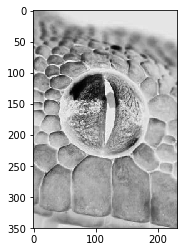

In [8]:
from PIL import Image

foto = Image.open('ojo.jpg')

datos = foto.getdata()

datos_invertidos = [255 - x for x in datos]

imagen_invertida = Image.new('L', foto.size)

imagen_invertida.putdata(datos_invertidos)

#imagen_invertida.save('ojo_2.jpg')

plt.imshow(np.asarray(imagen_invertida),cmap='gray')

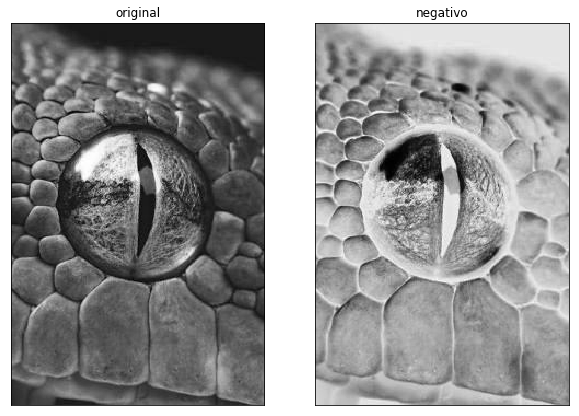

In [9]:
def negative(l):
  #cargar imagen
  img = cv2.imread("ojo.jpg", cv2.IMREAD_GRAYSCALE)
  rows, columns = img.shape
  img2 = np.zeros((rows,columns),dtype = np.uint8)
  for x in range(rows):
      for y in range(columns):
          img2[x, y] = (l-1)-img[x, y]
          
  displayGray2(img, img2, 'original', 'negativo')
  return

negative(256)

# **Transformación logaritmica**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


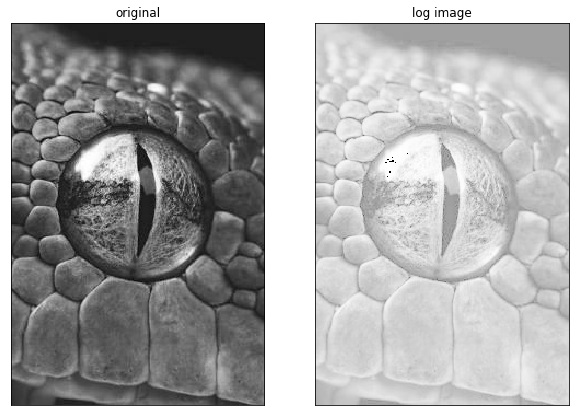

In [0]:
import cv2
import numpy as np
#Load the image
img = cv2.imread('ojo.jpg')
# Apply log transform
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
#specify the data type
img_log = np.array(img_log,dtype=np.uint8)
# display the image
displayGray2(img,img_log,'original', 'log image')

# **Gamma**

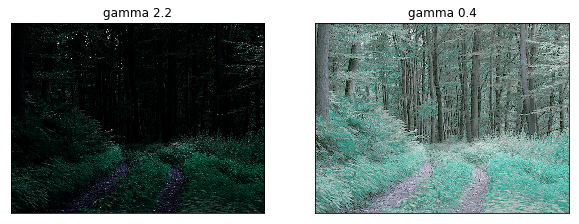

In [11]:
import numpy as np
import cv2
#Load the image
img = cv2.imread('tree.png')

gamma_two_point_two = np.array(255*(img/255)**2.2,dtype='uint8')

gamma_point_four = np.array(255*(img/255)**0.4,dtype='uint8')

displayGray2(gamma_two_point_two,gamma_point_four,'gamma 2.2','gamma 0.4')

# **Binarización**

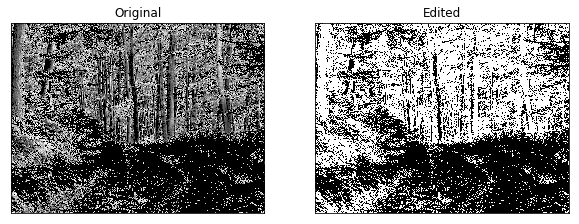

In [25]:
def binarizacion(img,minr=10,maxr=60):
  img = cv2.imread(img,0)
  
  row, column = img.shape
  
  img1 = np.zeros((row,column),dtype = 'uint8')
  
  min_range = minr
  max_range = maxr
  
  for i in range(row):
    for j in range(column):
        if img[i,j]>min_range and img[i,j]<max_range:
            img1[i,j] = 255
        else:
          img[i,j] = 0
   #Display the image
  displayGray2(img,img1)
  
binarizacion('tree.png',10,60)
  
    